## Understanding the atrributes of the data set

1) The dataset has around 21 attributes and the attributes can be further divided into subcategories such as Client information,
 Information pertaining to his last contact, Information from last campaign to present campaign.
 
##### Attributes regarding Client Information:
1) age, job, marital, education, default, housing, loan

##### Attributes giving information pertaining to his last contact of current campaign and current campaign 
2) contact, Month, day, duration, campaign, pdays

##### Attributes giving information pertaining to last campaign
3) poutcome, previous

##### other socio economic attributes
4) emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed.


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##### Followed OSEMN  APPROACH TO DO THE ANALYSIS
- Obtaining the data
- Scrubbing the data 
- Exploring the data
- Modelling the data
- Tuning the models of the data 

### Obtaining The data

- For Exploratory analysis and Feature engineering purposes it is generally a good idea to combine all the given data at first and perform feature engineering then later divide them into Train and Test datasets. This ensures homogenity of steps perfomed on test and train data sets and saves us some time by avoiding perfoming same steps on test and train datasets.

In [143]:
bank_full_add = pd.read_csv('bank-additional-full.csv')
bank = pd.read_csv('bank-additional.csv')

In [144]:
bank_full_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [145]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [146]:
# both the data has same no of columns and from head view we can confirm columns are in same order so both dataframes can be concatnated without any hindarnce
print(bank_full_add.shape, bank.shape) 


(41188, 21) (4119, 21)


## Scrubbing the data

#### Dropping the Duplicated values

In [147]:
full = pd.concat([bank_full_add,bank], axis = 0)
full.duplicated().value_counts() #see if there is any duplicated data in the dataset
data = full.drop_duplicates()
data.shape

(41176, 21)

In [148]:
# Check for missing values in the colums
data.apply(lambda x: sum(x.isnull()))



age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- Missing values are not present in the data set but from the metadata we know that some of the categorical values are Unkownn or either they are replaced with value 999 ( as present in pdays variable)

## Exploratory Data Analysis

#### Basic Satistics of Numerical Variables 

In [149]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Some observations
- Duration Attribute has outliers as we can see that the maximum is 4918 and 75 percentile value is 319. Anyhow we will not be using this attribute as this is highly correlated with dependent variable
- pdays min is 0 and max is 999 (where 999 represents client was not previously contacted.)
- The deviation of Numerical values is very high from one variables to other so standardisation of the variables  is requiredto caputre better relationship between them. 

In [150]:
## Lets see unique values distribution in categorical variables
data.apply(lambda x: len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

- This tells us that our customers are working in  12 job categories 
- Though emp.var.rate, cons.price.indx, cons.conf.idx, euriborm3m are numerical variables there are less no of unique values.

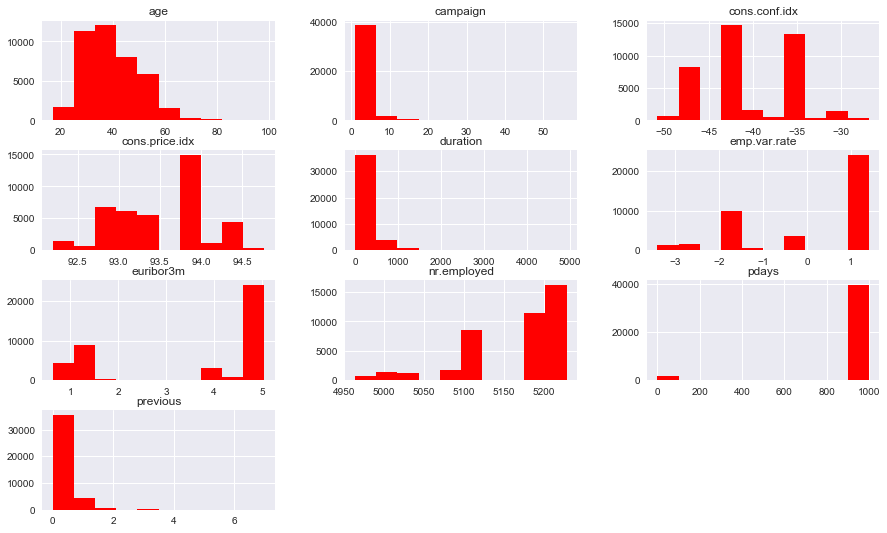

In [153]:
data.hist(bins=10, figsize=(15,9), color="r")
plt.show()

- Most of the variables are highly left skewed 

## Categorical Variables

In [151]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Frequency of Categories for varible marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

Frequency of Categories for varible education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

Frequency of Categories for varible default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64

Frequency of Categories for varible housing
yes        21571
no         18615
un

- Above analysis is performed to check for inconsistency of categories present in the variables. We can see that there are no incosistancies such as similar category with two different names (i.e. nonexistent represented in short as ne) 

In [154]:
## Converting some of the categrical columns which have yes or no to 1 or 0 so that plotting wiil be easier to plot
data['mod_housing'] = data['housing'].apply(lambda x: 0 if x == 'no' else 1)
data['mod_deposit'] = data['y'].apply(lambda x: 0 if x == 'no' else 1)
data['mod_loan'] = data['loan'].apply(lambda x: 0 if x == 'no' else 1)
data['mod_default'] = data['default'].apply(lambda x: 0 if x == 'no' else 1)

In [156]:
#Drop the original columns after modifying the data
data.drop(['housing', 'y', 'loan', 'default'], axis=1, inplace = True)

### How many of our customers have accepted the term deposit and refused the term deposit in total

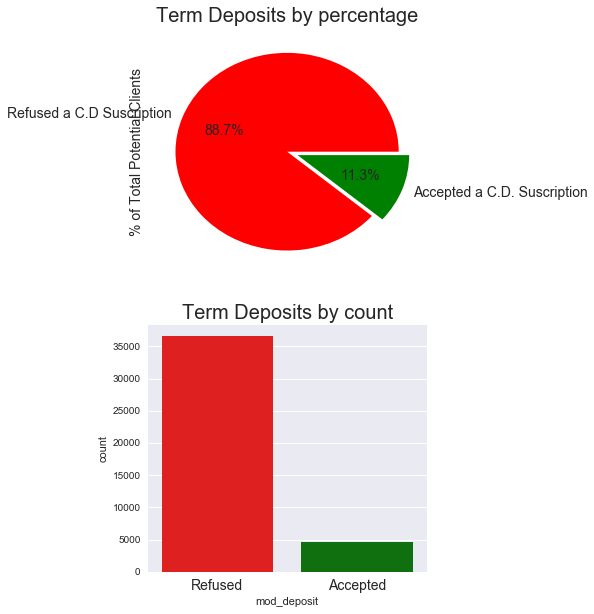

In [225]:
f,ax=plt.subplots(2,1,figsize=(5,10))
colors=["r", "g"]
labels = 'Refused a C.D Suscription', 'Accepted a C.D. Suscription'
data['mod_deposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Term Deposits by percentage', fontsize=20)
ax[0].set_ylabel('% of Total Potential Clients', fontsize=14)
sns.countplot('mod_deposit',data=data,ax=ax[1], palette= colors)
ax[1].set_title('Term Deposits by count', fontsize=20)
ax[1].set_xticklabels(['Refused', 'Accepted'], fontsize=14)


- It can interepeted that our dataset is highly skewed large no of refusal when compared to acceptance and have to take extra precaution while sampling or splitting the data

##### Analysing the Refusal and acceptance rate by month

- Percentage of acceptance and refusal by month and from that we can see have an idea which month are performing better and poorer

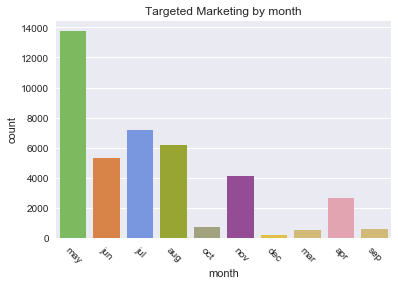

In [265]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC', '#E0C068']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='month', data=data, palette=color_types).set_title('Targeted Marketing by month');
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.figure(figsize=(15, 10))

- here may june, jly and august months are highly targeted

In [173]:
cross_month = pd.crosstab(data['month'], data['mod_deposit']).apply(lambda x: x/x.sum() * 100, axis=1)
cross_month

mod_deposit,0,1
month,,
apr,79.513493,20.486507
aug,89.394430,10.605570
dec,51.098901,48.901099
jul,90.961082,9.038918
jun,89.488530,10.511470
mar,49.450549,50.549451
may,93.564320,6.435680
nov,89.853659,10.146341
oct,56.066946,43.933054


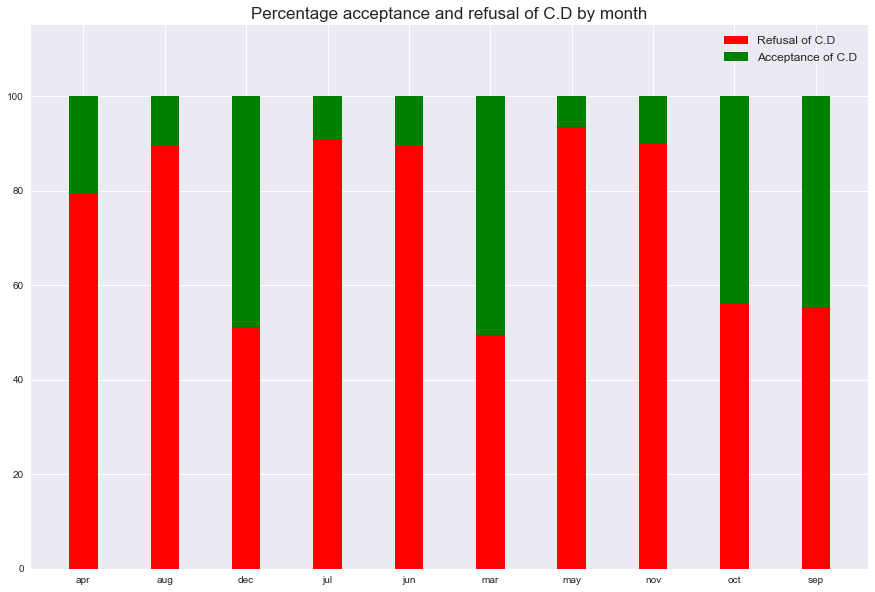

In [207]:
plt.figure(figsize=(15, 10))
p1 = plt.bar(np.arange(cross_month.shape[0]), cross_month[0], width =0.35, tick_label = cross_month.index, color ='red', label ='Refusal of C.D')
p2 =plt.bar(np.arange(cross_month.shape[0]), cross_month[1], width =0.35, tick_label = cross_month.index, color='green', bottom=cross_month[0], label ='Acceptance of C.D')
plt.title('Percentage acceptance and refusal of C.D by month', size = 17)
plt.ylim(ymin =0 , ymax =115)
plt.legend((p1[0], p2[0]), ('Refusal of C.D', 'Acceptance of C.D'), fontsize = 'large')

- From above bar graph it can be seen that march, sepetember, october and december are performing better and have equal acceptance and refusal ratio compared to other months
- Other than  march, sepetember, october and december all other months are performing very poor
- Though may month is high targeted it thas vey less accepetnce rate despite being highly targeted month compared to other months


In [216]:
data['duration'] = data['duration']/60

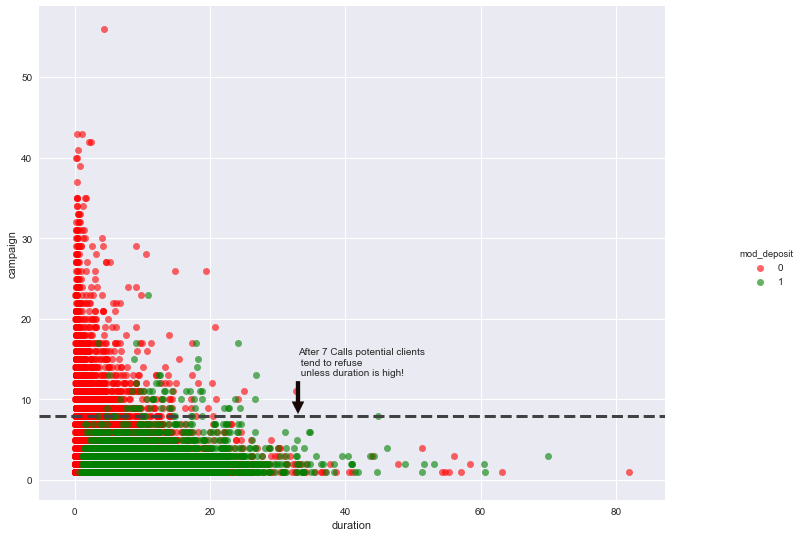

In [221]:
g = sns.lmplot(x='duration', y='campaign', data=data,
           fit_reg=False, # No regression line
           hue='mod_deposit',
        palette = ['red', 'green'],
        scatter_kws={'alpha':0.6}
          ) 
g.fig.set_size_inches(12,8)
plt.axhline(y=8, linewidth=3, color="#424242", linestyle='--')
plt.annotate('After 8 Calls potential clients \n tend to refuse \n unless duration is high!', xy=(33, 8), xytext=(33,13),
            arrowprops=dict(facecolor='#190707', shrink=0.05))

- Campaign and duration are highly important features from the above graph we can conclude that if the duration is less and campaign calls are higher than 7 then tha rate of refusal is very high 

In [231]:
def category_age(x): 
    if 18 < x < 30:
        return '18-29'
    elif 30 <= x < 45:
        return '30-44'
    elif 45 <= x < 60:
        return '45-59'
    else:
        return '>60'

In [232]:
data['age_category'] = data['age'].map(category_age)

In [236]:
cross_age_category = pd.crosstab(data['mod_deposit'], data['age_category']).apply(lambda x: x/x.sum() * 100, axis=0)
cross_age_category = cross_age_category.transpose()
cross_age_category

mod_deposit,0,1
age_category,,
18-29,83.883564,16.116436
30-44,90.398158,9.601842
45-59,90.824672,9.175328
>60,60.326531,39.673469


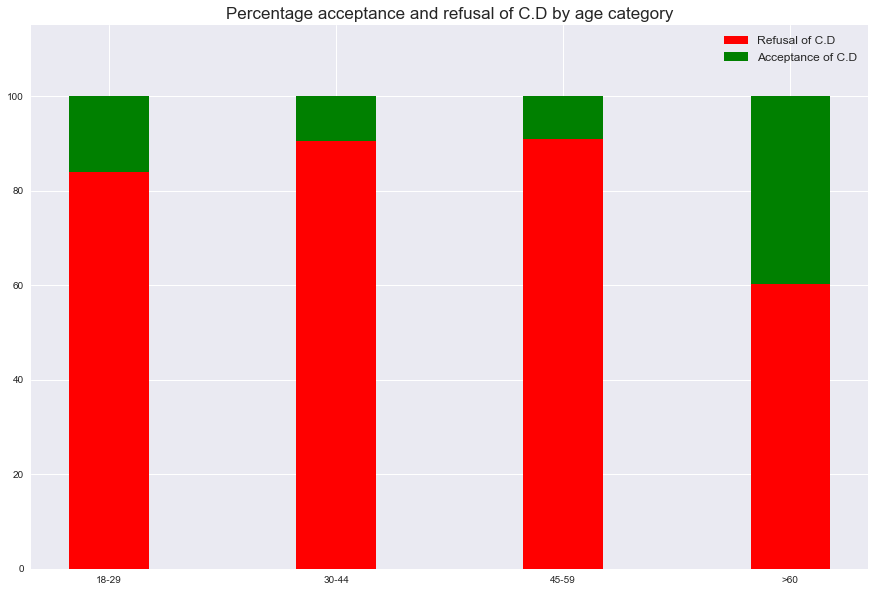

In [238]:
plt.figure(figsize=(15, 10))
p1 = plt.bar(np.arange(cross_age_category.shape[0]), cross_age_category[0], width =0.35, tick_label = cross_age_category.index, color ='red', label ='Refusal of C.D')
p2 =plt.bar(np.arange(cross_age_category.shape[0]), cross_age_category[1], width =0.35, tick_label = cross_age_category.index, color='green', bottom=cross_age_category[0], label ='Acceptance of C.D')
plt.title('Percentage acceptance and refusal of C.D by age category', size = 17)
plt.ylim(ymin =0 , ymax =115)
plt.legend((p1[0], p2[0]), ('Refusal of C.D', 'Acceptance of C.D'), fontsize = 'large')

- people with more than 60 years are more likely to accept the C.D than other age categories. This might be because they are retired and most of the old people will not have any expenditure so they might invest their savings in C.D

### Job Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

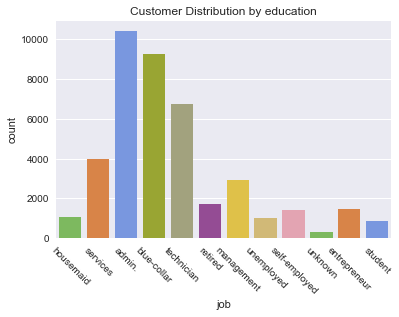

In [266]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='job', data=data, palette=color_types).set_title('Customer Distribution by education');
 
# Rotate x-labels
plt.xticks(rotation=-45)

- students, housemaid, entreprenuer are least tartgeted as it may be that they have fewer savings (may not be in the case of entrepreuers but they are unlinkely to deposit and more likely to take loans)

In [240]:
cross_job_category = pd.crosstab(data['mod_deposit'], data['job']).apply(lambda x: x/x.sum() * 100, axis=0)
cross_job_category = cross_job_category.transpose()
cross_job_category

mod_deposit,0,1
job,,
admin.,87.033305,12.966695
blue-collar,93.104939,6.895061
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.738068,25.261932
self-employed,89.514426,10.485574
services,91.857827,8.142173
student,68.571429,31.428571


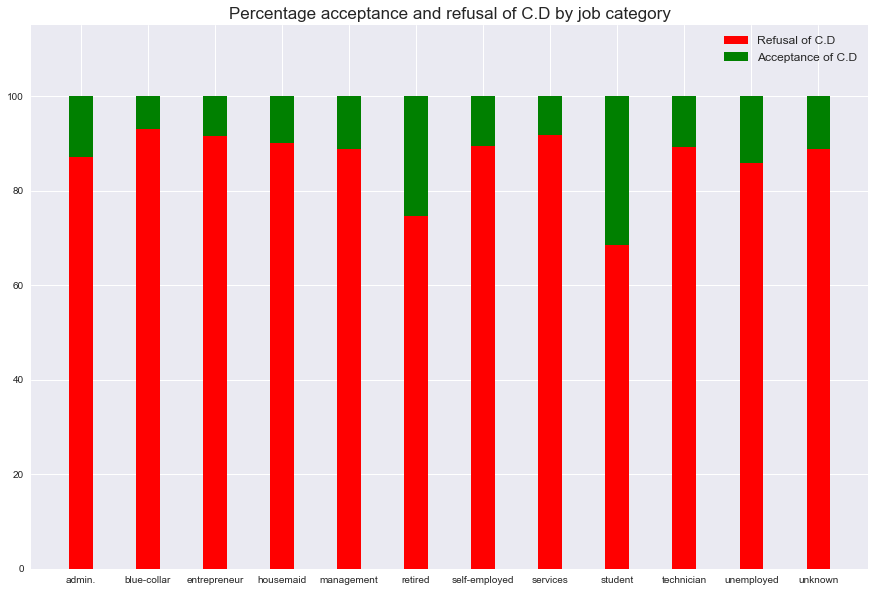

In [241]:
plt.figure(figsize=(15, 10))
p1 = plt.bar(np.arange(cross_job_category.shape[0]), cross_job_category[0], width =0.35, tick_label = cross_job_category.index, color ='red', label ='Refusal of C.D')
p2 =plt.bar(np.arange(cross_job_category.shape[0]), cross_job_category[1], width =0.35, tick_label = cross_job_category.index, color='green', bottom=cross_job_category[0], label ='Acceptance of C.D')
plt.title('Percentage acceptance and refusal of C.D by job category', size = 17)
plt.ylim(ymin =0 , ymax =115)
plt.legend((p1[0], p2[0]), ('Refusal of C.D', 'Acceptance of C.D'), fontsize = 'large')

- The above bar graph supports our conclusions in the age category bar graph. Here we can see that retired and students are more likely to accept the C.D compared to other categories.

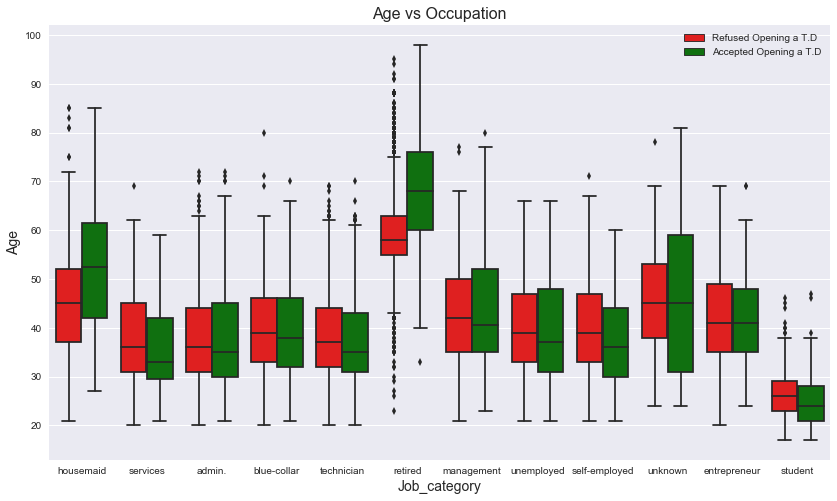

In [243]:
ax = plt.figure(figsize=(14,8))
# 0 = Did not suscribe term deposits, 1 = Did suscribe term deposits.
ax = sns.boxplot(x="job", y="age", hue="mod_deposit",
                  data=data, palette={0:'r', 1:'g'})
plt.title("Age vs Occupation", fontsize=16)
plt.xlabel(s="Job_category", fontsize=14)
plt.ylabel(s="Age", fontsize=14)
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused Opening a T.D')
legend_name.get_texts()[1].set_text('Accepted Opening a T.D')

plt.show()

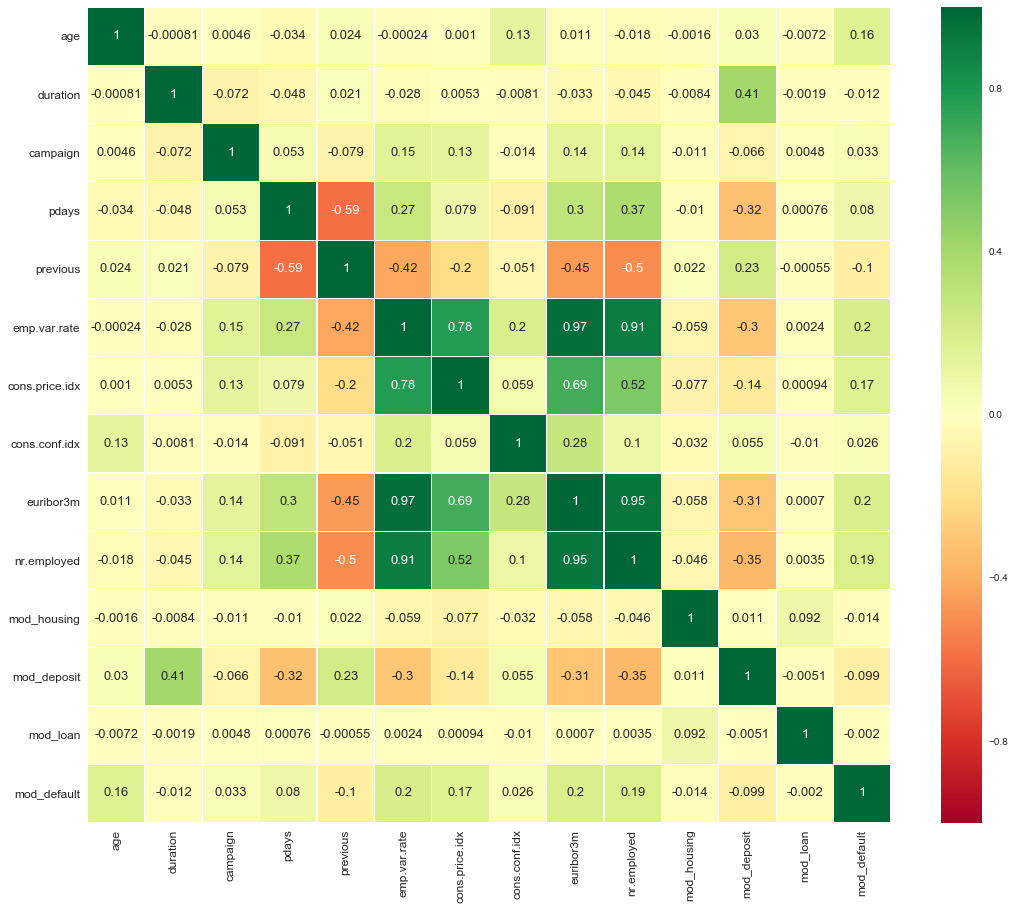

In [247]:
corr = data.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':13})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- The more the intensity of the green color of a particular box the more is positive correlation between the two variables. Similary
 the more is the intensity of the red color the more variables are negatively correlated
- Social and economic attributes are highly coorelated so during model building we can choose one of the variable which will help us in capturing all the information required for predicting target variable

### Relationship between Education and Deposits

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

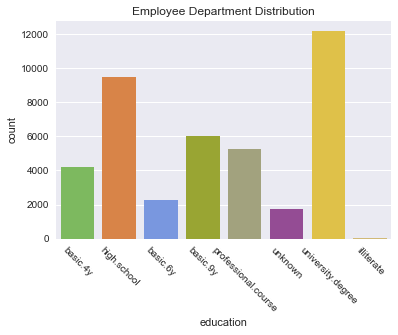

In [252]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='education', data=data, palette=color_types).set_title('Customer Distribution by education');
 
# Rotate x-labels
plt.xticks(rotation=-45)

- Marketing campaign is usually  concentrating Univesity degree and High school customers. 

In [260]:
cross_education_category = pd.crosstab(data['mod_deposit'], data['education']).apply(lambda x: x/x.sum() * 100, axis=0)
cross_education_category = cross_education_category.transpose()

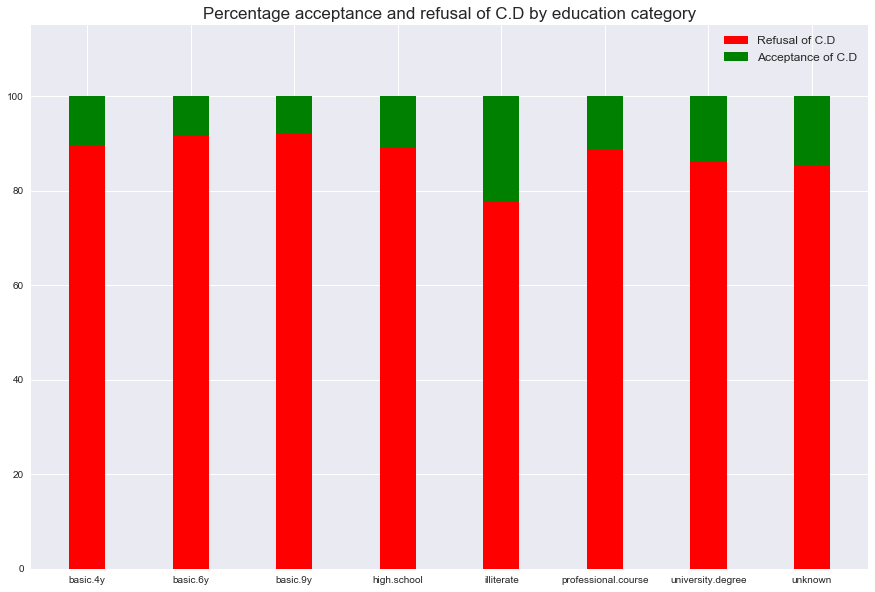

In [261]:
plt.figure(figsize=(15, 10))
p1 = plt.bar(np.arange(cross_education_category.shape[0]), cross_education_category[0], width =0.35, tick_label = cross_education_category.index, color ='red', label ='Refusal of C.D')
p2 =plt.bar(np.arange(cross_education_category.shape[0]), cross_education_category[1], width =0.35, tick_label = cross_education_category.index, color='green', bottom=cross_education_category[0], label ='Acceptance of C.D')
plt.title('Percentage acceptance and refusal of C.D by education category', size = 17)
plt.ylim(ymin =0 , ymax =115)
plt.legend((p1[0], p2[0]), ('Refusal of C.D', 'Acceptance of C.D'), fontsize = 'large')

In [55]:
# Relationship between loan and subscription terms


## Feature engineering


In [51]:
# Moving the deposit column to the last column.
Cred_dep = data['y']
data.drop(labels=['y'], axis=1,inplace = True)
data.insert(data.shape[1]-1, 'Cred_deposit', Cred_dep)
data['Cred_deposit'].value_counts() #the dataset is skewed there are higher no of  No's than Yes

no     36537
yes     4639
Name: Cred_deposit, dtype: int64

In [52]:
### step 1 Combining categories in job entrepruer as self employed

data['mod_job'] = data['job']
data.loc[data['mod_job'] =='entrepreneur', 'mod_job' ] = 'self-employed'

In [56]:
def quarter(x):
    if x in ['jan', 'feb', 'mar']:
        return 'q1'
    elif x in ['apr', 'may', 'jun']:
        return 'q2'
    elif x in ['jul', 'aug', 'sep']:
        return 'q3'
    else:
        return 'q4'

data['mod_month'] = data.month.map(quarter)

In [57]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,Cred_deposit,nr.employed,mod_job,age_category,mod_education,mod_month
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,no,5191.0,housemaid,older,level1,q2
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,no,5191.0,services,older,level2,q2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,no,5191.0,services,elder,level2,q2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,no,5191.0,admin.,elder,level1,q2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,no,5191.0,services,older,level2,q2


In [58]:
data.drop(['month','education', 'job'], axis=1, inplace = True)
data.drop(['age'], axis = 1, inplace = True)

In [75]:
data.drop(['duration'], axis =1, inplace = True)

In [59]:
data.columns

Index(['marital', 'default', 'housing', 'loan', 'contact', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'Cred_deposit',
       'nr.employed', 'mod_job', 'age_category', 'mod_education', 'mod_month'],
      dtype='object')

In [60]:
data_copy = data.copy()

In [139]:
X = pd.get_dummies(data_copy[['marital', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'job', 'age', 'education'
]])

KeyError: "['job' 'age' 'education'] not in index"

In [128]:
X = data[['marital', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'mod_job', 'age_category', 'mod_education',
       'mod_month']]

In [129]:
categorical_columns = [x for x in X.dtypes.index if X.dtypes[x]=='object']


In [130]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

for col in categorical_columns:
    X[col]= lb_make.fit_transform(X[col])


TypeError: '>' not supported between instances of 'str' and 'float'

In [131]:
X["mod_education"] = X["mod_education"].astype('category').cat.codes


In [132]:
X["mod_month"] = X["mod_month"].astype('category').cat.codes

In [133]:

y = data["Cred_deposit"].astype('category').cat.codes

In [134]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)      
StratifiedShuffleSplit(n_splits=3, random_state=0)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 2474 24354 15274 ..., 24255 27045 37447] TEST: [29378 11594 17610 ..., 24676 29588 23104]
TRAIN: [ 4981 40725 13062 ..., 36069 20756 35573] TEST: [19025  2323 37180 ..., 13811  4649 27199]
TRAIN: [26244 26051  2287 ..., 24976 17308 38467] TEST: [14697 38646 23598 ..., 28705  5224 22931]


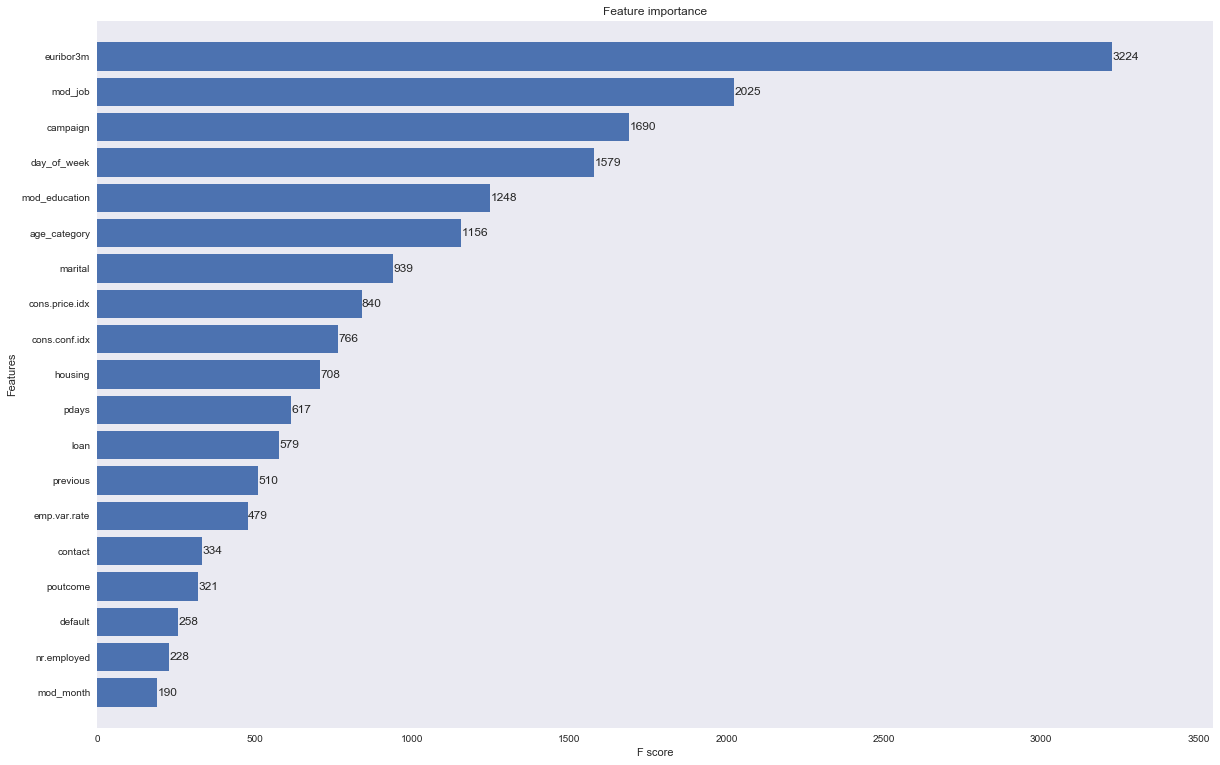

In [100]:

#Analyze Variable Importance using XGB
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'silent': 1,
    'seed' : 0,
    'lambda':5
}

train = xgb.DMatrix(X,y)
boost_model = xgb.train(xgb_params,train,num_boost_round=150)
fig, ax = plt.subplots(1,1,figsize= (20, 13))
xgb.plot_importance(boost_model, grid = False, height= 0.8, ax=ax)
plt.show()


In [ ]:
XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=300, 
              silent=True, objective='binary:logistic', booster='gbtree', 
              n_jobs=1, nthread=None, gamma=0, min_child_weight=1)

In [66]:
y_train['Cred_deposit'].value_counts()

no     25576
yes     3247
Name: Cred_deposit, dtype: int64

In [67]:
y_test['Cred_deposit'].value_counts()

no     10961
yes     1392
Name: Cred_deposit, dtype: int64

In [135]:
from sklearn import metrics
Dt = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=6, min_samples_leaf=70)
Dt.fit(X_train,y_train)
pred3 = Dt.predict(X_test)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, Dt.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, Dt.predict(X_test)))



 ---Decision Tree Model---
Decision Tree AUC = 0.59
             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10961
          1       0.69      0.20      0.31      1392

avg / total       0.88      0.90      0.87     12353



In [137]:
rf = RandomForestClassifier(
    n_estimators=50, 
    max_depth= 10, 
    min_samples_split=20,
    min_samples_leaf=7,
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.67
             precision    recall  f1-score   support

          0       0.93      0.88      0.90     10961
          1       0.33      0.47      0.39      1392

avg / total       0.86      0.83      0.84     12353



In [109]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))



 ---AdaBoost Model---
AdaBoost AUC = 0.60
             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10961
          1       0.70      0.20      0.32      1392

avg / total       0.88      0.90      0.88     12353



In [127]:
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))



 ---Logistic Model---
Logistic AUC = 0.66
             precision    recall  f1-score   support

          0       0.93      0.81      0.87     10961
          1       0.26      0.51      0.34      1392

avg / total       0.85      0.78      0.81     12353



In [138]:
GBC = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, subsample=1.0, min_samples_split=5, min_samples_leaf=2, max_depth=15)
GBC.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, GBC.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, GBC.predict(X_test)))



 ---Logistic Model---
Logistic AUC = 0.59
             precision    recall  f1-score   support

          0       0.91      0.97      0.94     10961
          1       0.47      0.22      0.30      1392

avg / total       0.86      0.88      0.87     12353



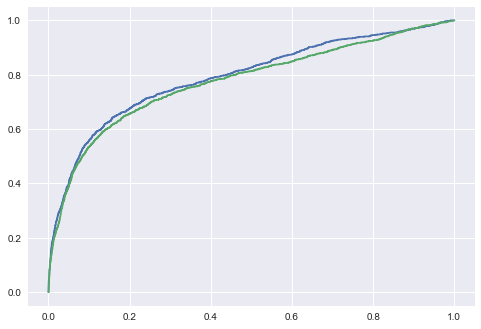

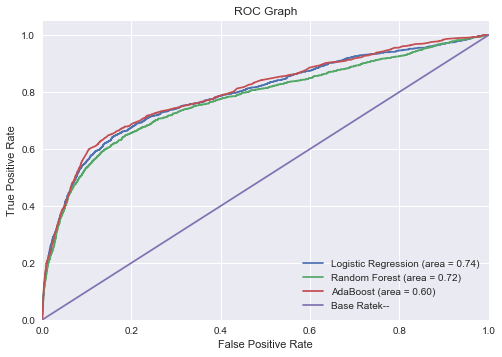

In [113]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)


# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
gf = GradientBoostingRegressor(learning_rate=0.1, n_estimators=45, subsample=1.0,  
                          min_samples_split=2, min_samples_leaf=150, max_depth=6, random_state=None, 
                          alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False )
gf.fit(X_train_scaled,y_train)
pred3 = gf.predict(X_test_scaled)